#📌 Extracción

In [236]:
import pandas as pd

In [237]:
url = "https://raw.githubusercontent.com/Sebas1020h/Challenge-TelecomX-pt-1/main/TelecomX_Data.json"

In [238]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [240]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [241]:
customer_df = pd.json_normalize(df["customer"])
df = df.drop(columns=["customer"]).join(customer_df.add_prefix("customer_"))
df

,customerID,Churn,phone,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13
7263,9992-RRAMN,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22
7264,9992-UJOEL,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2
7265,9993-LHIEB,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67


In [242]:
phone_df = pd.json_normalize(df["phone"])
df = df.drop(columns=["phone"]).join(phone_df.add_prefix("phone_"))
df

,customerID,Churn,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No
7263,9992-RRAMN,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes
7264,9992-UJOEL,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No
7265,9993-LHIEB,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No


In [243]:
account_df = pd.json_normalize(df["account"])
df = df.drop(columns=["account"]).join(account_df.add_prefix("account_"))
df

,customerID,Churn,internet,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,Yes,Yes,9,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,No,No,9,Yes,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,No,No,4,Yes,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,1,Yes,No,13,Yes,No,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,1,Yes,No,3,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,No,No,13,Yes,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,Yes,No,22,Yes,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,Yes,Yes,67,Yes,No,Two year,No,Mailed check,67.85,4627.65


In [244]:
internet_df = pd.json_normalize(df["internet"])
df = df.drop(columns=["internet"]).join(internet_df.add_prefix("internet_"))
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,...,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,65.60,593.3,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,59.90,542.4,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,73.90,280.85,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,98.00,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,83.90,267.4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,One year,...,Mailed check,55.15,742.9,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Month-to-month,...,Electronic check,85.10,1873.7,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,Month-to-month,...,Mailed check,50.30,92.75,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,Two year,...,Mailed check,67.85,4627.65,DSL,Yes,No,Yes,Yes,No,Yes


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   account_Contract           7267 non-null   object 
 10  account_PaperlessBilling   7267 non-null   object 
 11  account_PaymentMethod      7267 non-null   object 
 12  account_Charges.Monthly    7267 non-null   float64
 13  account_Charges.Total      7267 non-null   objec

In [246]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0, "": 0})

In [247]:
# Definir el mapeo de valores
mapping = {"Yes": 1, "No": 0, "No internet service": 0, None: 0, "": 0}

# Lista de columnas a transformar
cols_to_convert = [
    "customer_Partner",
    "customer_Dependents",
    "phone_PhoneService",
    "phone_MultipleLines",
    "internet_OnlineSecurity",
    "internet_OnlineBackup",
    "internet_DeviceProtection",
    "internet_TechSupport",
    "internet_StreamingTV",
    "internet_StreamingMovies"
]

# Aplicar el mapeo a las columnas seleccionadas
df[cols_to_convert] = df[cols_to_convert].replace(mapping)

/tmp/ipython-input-1701040114.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_to_convert] = df[cols_to_convert].replace(mapping)


In [248]:
df["Cuentas_Diarias"] = df["account_Charges.Monthly"] / 30

print(df[["account_Charges.Monthly", "Cuentas_Diarias"]].head())

   account_Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [249]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,...,account_Charges.Monthly,account_Charges.Total,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,One year,...,65.60,593.3,DSL,0,1,0,1,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,Month-to-month,...,59.90,542.4,DSL,0,0,0,0,0,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Month-to-month,...,73.90,280.85,Fiber optic,0,0,1,0,0,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Month-to-month,...,98.00,1237.85,Fiber optic,0,1,1,0,1,1,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Month-to-month,...,83.90,267.4,Fiber optic,0,0,0,1,1,0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,One year,...,55.15,742.9,DSL,1,0,0,1,0,0,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Month-to-month,...,85.10,1873.7,Fiber optic,0,0,0,0,0,1,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,Month-to-month,...,50.30,92.75,DSL,0,1,0,0,0,0,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,Two year,...,67.85,4627.65,DSL,1,0,1,1,0,1,2.261667


#📊 Carga y análisis

In [250]:
df.describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_Charges.Monthly,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,64.720098,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,30.129572,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


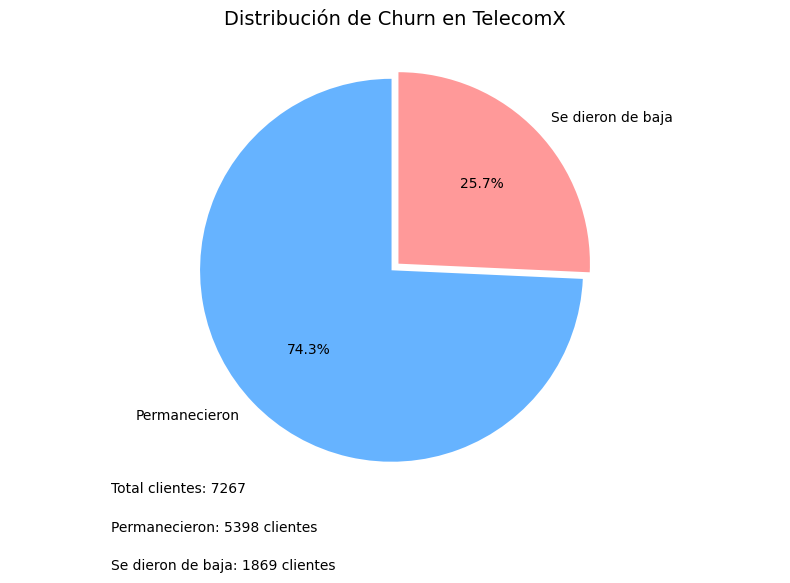

In [251]:
import matplotlib.pyplot as plt

# Contar los valores de Churn
churn_counts = df['Churn'].value_counts()

# Configurar el gráfico
plt.figure(figsize=(8, 6))
plt.pie(churn_counts,
        labels=['Permanecieron', 'Se dieron de baja'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=(0.05, 0))  # Separar ligeramente las porciones

# Añadir título
plt.title('Distribución de Churn en TelecomX', pad=20, fontsize=14)

# Mostrar el gráfico como un círculo perfecto
plt.axis('equal')

# Añadir información adicional
plt.text(-1.5, -1.2, f'Total clientes: {len(df)}', fontsize=10)
plt.text(-1.5, -1.4, f'Permanecieron: {churn_counts[0]} clientes', fontsize=10)
plt.text(-1.5, -1.6, f'Se dieron de baja: {churn_counts[1]} clientes', fontsize=10)

plt.tight_layout()
plt.show()

In [252]:
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn')
sns.set_palette("pastel")

# Lista de variables categóricas a analizar
categorical_vars = [
    'customer_gender',
    'account_Contract',
    'account_PaymentMethod',
    'internet_InternetService',
    'phone_PhoneService',
    'customer_Partner',
    'customer_Dependents'
]

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribución de Churn por Variables Categóricas', fontsize=16, y=1.02)

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Generar gráficos para cada variable categórica
for i, var in enumerate(categorical_vars[:6]):  # Limitamos a 6 gráficos
    # Calcular porcentajes
    prop_df = (df.groupby(var)['Churn']
                .value_counts(normalize=True)
                .mul(100)
                .rename('Porcentaje')
                .reset_index())

    # Crear gráfico de barras
    sns.barplot(x=var, y='Porcentaje', hue='Churn', df=prop_df, ax=axes[i])

    # Personalizar cada gráfico
    axes[i].set_title(f'Churn por {var.replace("_", " ").title()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].legend(['Permanece', 'Abandono'], title='Estado')

    # Añadir etiquetas de porcentaje
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

# Ajustar el layout
plt.tight_layout()
plt.show()

# Gráfico adicional para Internet Service (puede tener más categorías)
plt.figure(figsize=(10, 6))
prop_is = (df.groupby('internet_InternetService')['Churn']
            .value_counts(normalize=True)
            .mul(100)
            .rename('Porcentaje')
            .reset_index())

sns.barplot(x='internet_InternetService', y='Porcentaje', hue='Churn', df=prop_is)
plt.title('Churn por Tipo de Servicio de Internet')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Porcentaje (%)')
plt.legend(['Permanece', 'Abandono'], title='Estado')

# Añadir etiquetas de porcentaje
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

#📄Informe final

In [ ]:
df.to_csv("TelecomX_Data.csv", index=False)